<a href="https://colab.research.google.com/github/SoumyaTeotia/Foundation-of-Data-Science-Assignment/blob/main/a1_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FODS ASSIGNMENT

| NAME        | ID NUMBER   |
| ----------- | ----------- |
| Yashraj Hemant Mehta  | 2020B3A72226H        |
| Arundhati Bajaj  | 2020B3A71933H        |
| Soumya Teotia | 2020B4A72182H        |


# Assignment 1-A : Regression without regularization
### Problem Statement
● The given dataset is a synthetic dataset consisting of 1,000 data points, each having one feature variable and one continuous target variable.

Independent Variable : X , Dependent Variable : Y

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Data Preprocessing
a. Load the shared dataset into a pandas DataFrame.

b. Normalize the feature variable by utilizing the formula: X’ = (X - µ) / σ where µ represents the mean of feature value, and σ represents the standard deviation of feature values.

c. Shuffle the dataset and split the dataset into training and testing sets (80% for training and 20% for testing)


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data - A1.csv to Data - A1 (1).csv


In [3]:
data1 = pd.read_csv("Data - A1.csv")
data1

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955
...,...,...
995,0.671672,3.079356
996,-0.615616,0.027487
997,0.259259,1.068320
998,0.119119,0.245188


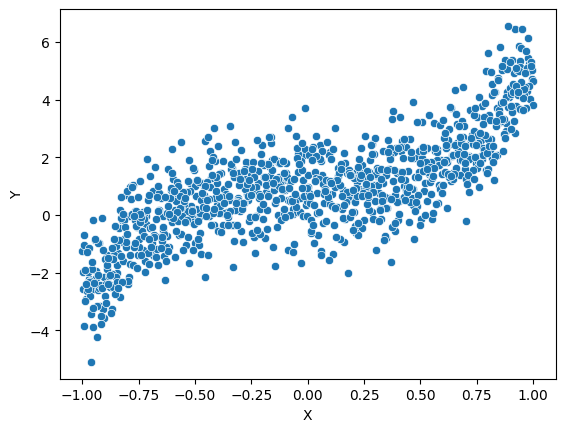

In [4]:
X = data1.iloc[:, 0]
Y = data1.iloc[:, 1]
sns.scatterplot(x='X', y='Y', data=data1)
plt.show()

In [5]:
mean_X = data1['X'].mean()
std_X = data1['X'].std()

# Normalize the 'X' column using the formula X' = (X - µ) / σ
data1['X_n'] = (data1['X'] - mean_X) / std_X
X_n = data1.iloc[:, 2]

In [6]:
data1_shuff = data1.sample(frac=1, random_state=42)  # frac=1 shuffles the entire DataFrame

# Calculate the number of rows for training and testing
rows = data1_shuff.shape[0]
size = int(0.8 * rows)  # 80% for training, 20% for testing

# Split the DataFrame into training and testing sets
train1 = data1_shuff.iloc[:size, :]
test1 = data1_shuff.iloc[size:, :]



In [7]:
# Display the training and testing sets
print("Training Set:")
print(train1)

print("\nTesting Set:")
print(test1)

Training Set:
            X         Y       X_n
521 -0.851852 -1.070249 -1.473239
737 -0.853854 -2.724890 -1.476701
740  0.159159  2.149207  0.275258
660 -0.617618  0.324686 -1.068141
411 -0.219219  1.525150 -0.379130
..        ...       ...       ...
619 -0.125125  0.997457 -0.216398
855  0.479479  0.452928  0.829238
803  0.243243  0.675559  0.420678
645 -0.437437  1.685355 -0.756528
846 -0.927928 -0.965680 -1.604809

[800 rows x 3 columns]

Testing Set:
            X         Y       X_n
556  0.673674  1.374630  1.165088
957  0.595596  0.768013  1.030055
577  0.485485  3.212694  0.839625
795 -0.765766 -0.951182 -1.324357
85   0.387387 -0.545128  0.669969
..        ...       ...       ...
106  0.333333  1.124725  0.576485
270  0.423423  1.983633  0.732291
860 -0.803804 -0.950440 -1.390142
435 -0.551552 -1.211945 -0.953883
102 -0.869870 -2.034611 -1.504400

[200 rows x 3 columns]


In [8]:
X_train = train1[['X_n']]
Y_train = train1['Y']
X_test = test1[['X_n']]
Y_test = test1['Y']

# Task 2: Polynomial Regression

a. Build polynomial regression models (with degrees varying from 1 to 9) to predict the target variable based on the input feature variable. Determine the degree of the polynomial which best fits the given data.

b. Apply batch gradient descent to train the models.



In [9]:
def polynomial_regression(X, Y, d, alpha, epochs):
    m = len(X)
    w = np.zeros(d + 1)  # Initialize model coefficients with zeros
    X_mat = np.column_stack([X**i for i in range(d + 1)])  # Create polynomial features
    X_test_mat = np.column_stack([X_test**i for i in range(d + 1)])
    for _ in range(epochs):
        predictions = np.dot(X_mat, w)
        error = predictions - Y
        gradient = np.dot(X_mat.T, error) / m
        w -= alpha * gradient
        Y_train_pred = np.dot(X_mat, w)
        Y_test_pred = np.dot(X_test_mat, w)
        train_err_epoch.append(np.sqrt(np.mean((Y_train - Y_train_pred)**2)))
        test_err_epoch.append(np.sqrt(np.mean((Y_test - Y_test_pred)**2)))

    # Make predictions on the training and testing sets
    Y_train_pred = np.dot(X_mat, w)
    Y_test_pred = np.dot(X_test_mat, w)

    # Calculate training and testing RMSE
    train_err.append(np.sqrt(np.mean((Y_train - Y_train_pred)**2)))
    test_err.append(np.sqrt(np.mean((Y_test - Y_test_pred)**2)))

    return w

c. Train each model for 500 iterations.

## Task 3: Graph Plotting

a) Training Error and Testing Error v/s Epochs for all degree of polynomials in [1, 9]

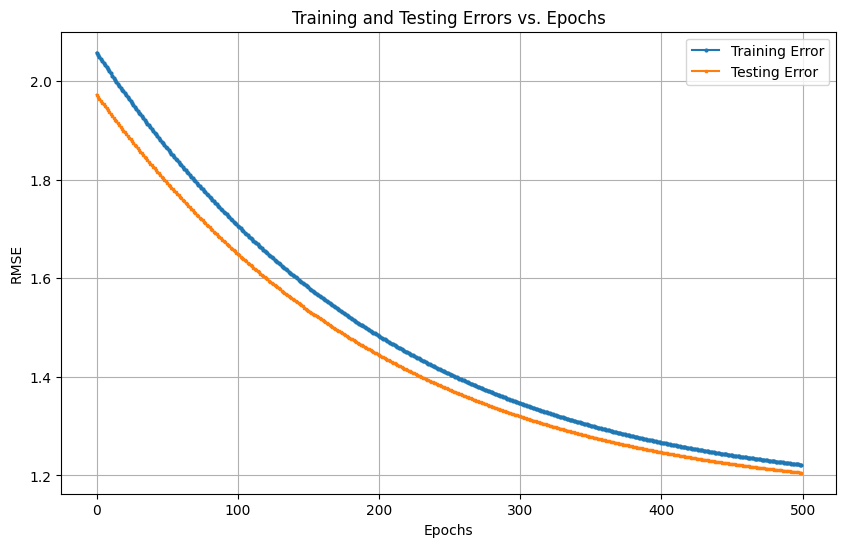

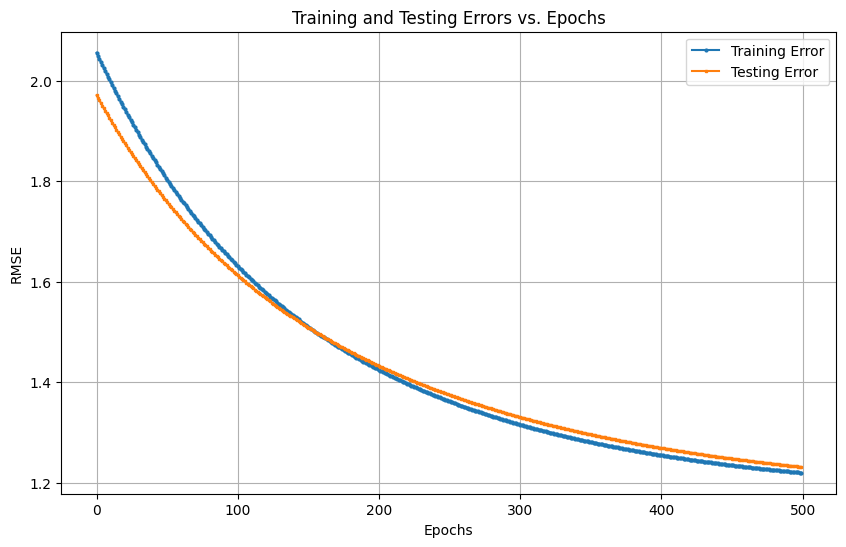

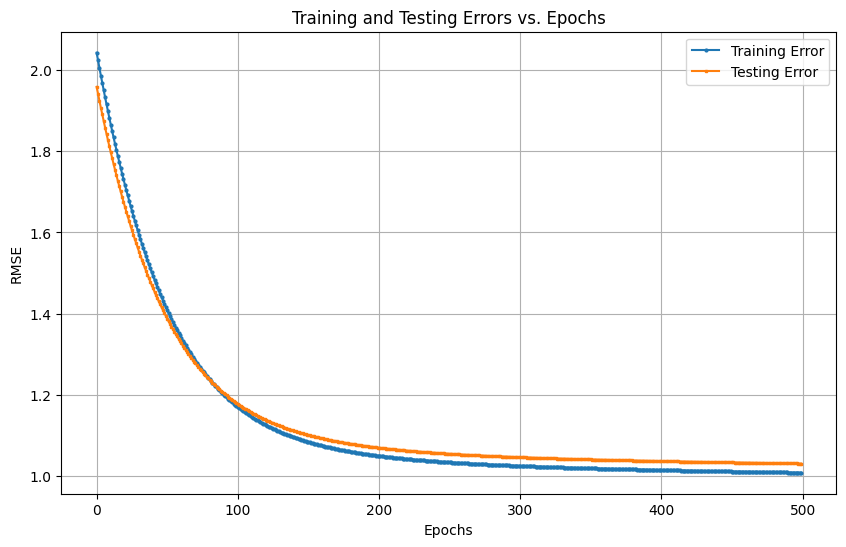

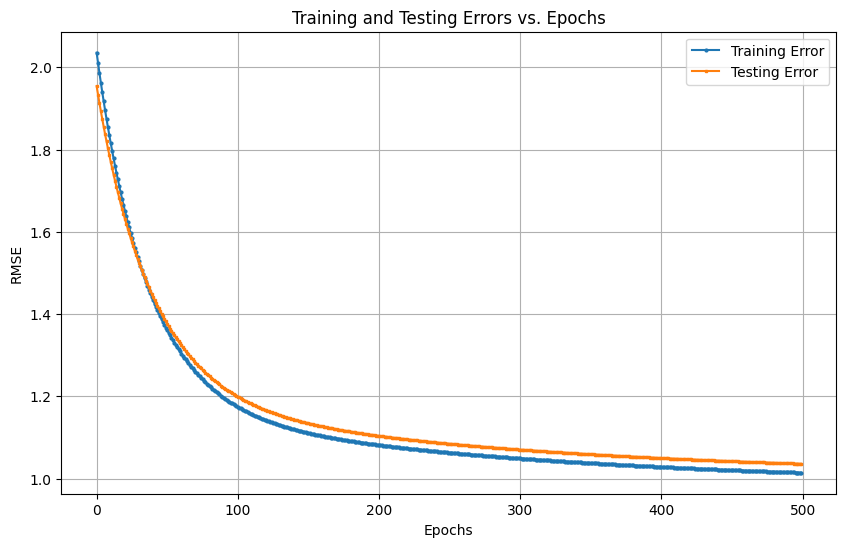

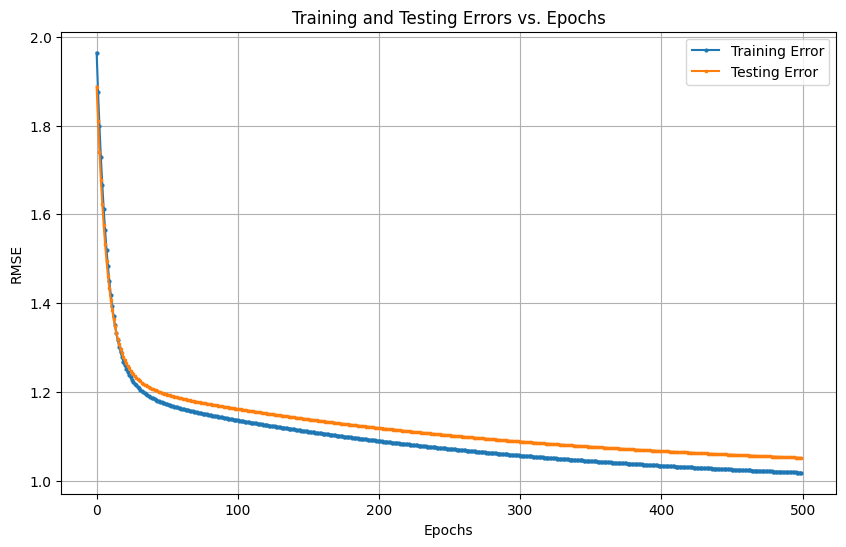

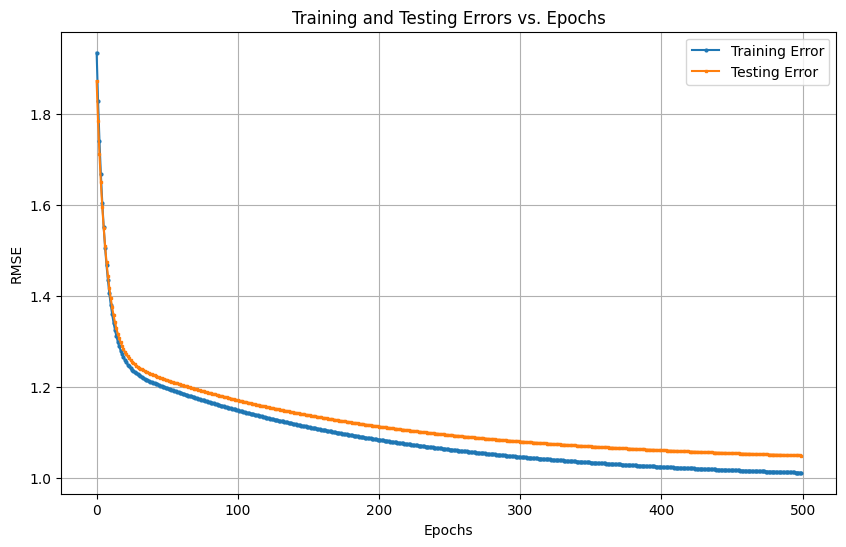

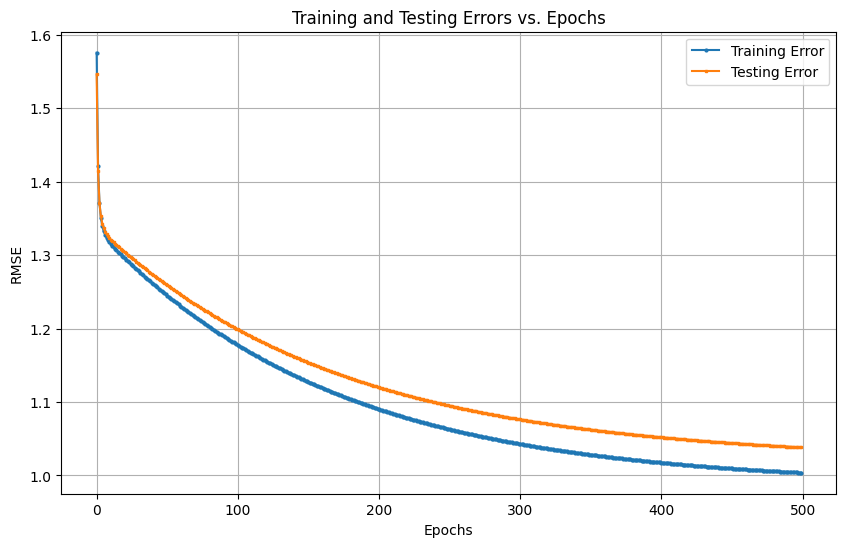

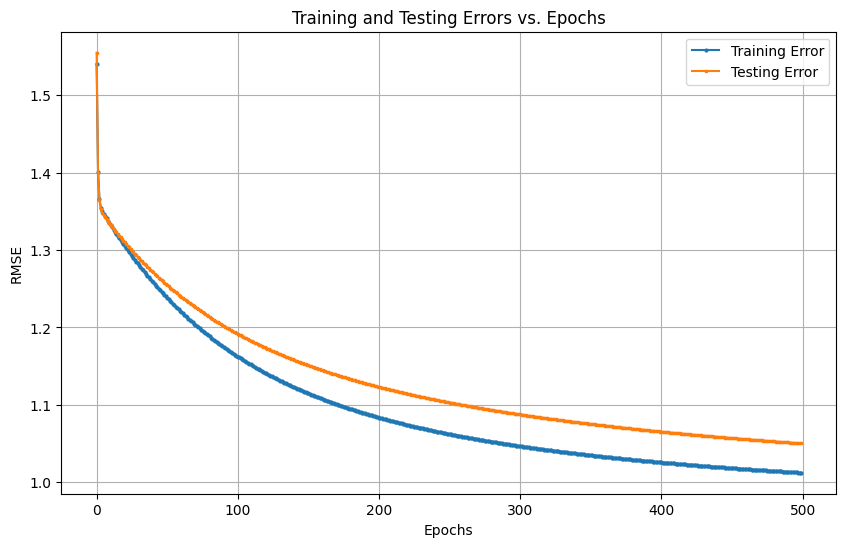

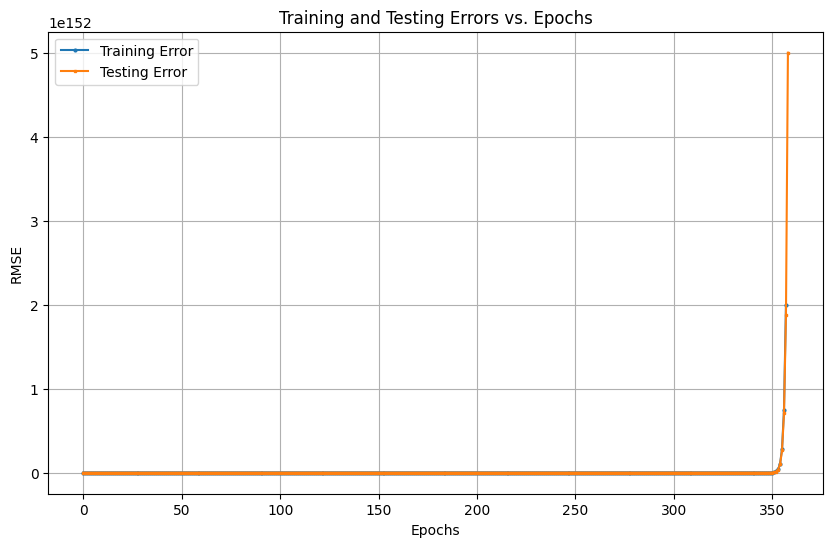

In [10]:
degrees = list(range(1, 10))
coeff = []
train_err = []
test_err = []
for d in degrees:
    alpha = 0.003  # Learning rate
    epochs = 500  # Number of iterations
    train_err_epoch = []
    test_err_epoch = []
    # Train the model for the current degree
    w = polynomial_regression(X_train, Y_train, d, alpha, epochs)

    # Store the coefficients for this degree
    coeff.append(w)
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), train_err_epoch, label='Training Error', marker='o', markersize=2)
    plt.plot(range(epochs), test_err_epoch, label='Testing Error', marker='s', markersize=2)
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.title('Training and Testing Errors vs. Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()









b) Final Training and Testing Errors v/s degree of polynomial

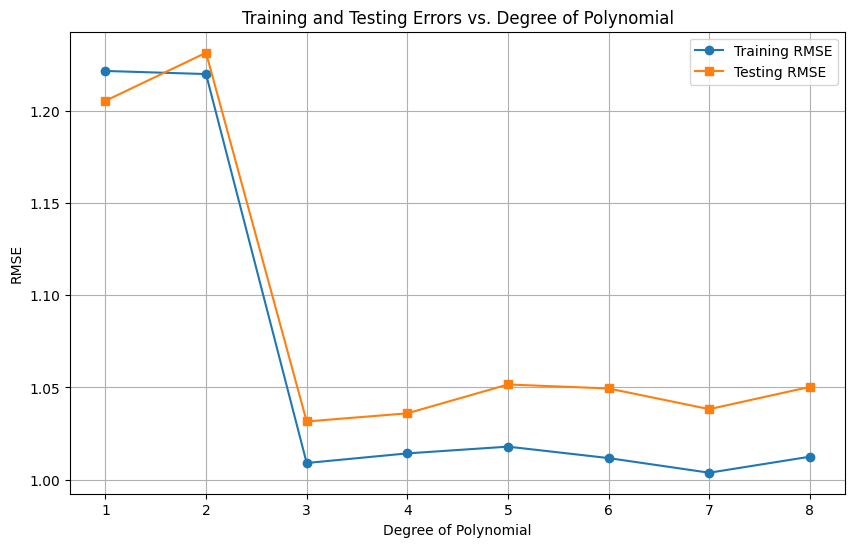

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(degrees[:8], train_err[:8], marker='o', label='Training RMSE')
plt.plot(degrees[:8], test_err[:8], marker='s', label='Testing RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.title('Training and Testing Errors vs. Degree of Polynomial')
plt.legend()
plt.grid(True)
plt.show()

c) The best polynomial fitted curve on the data points.

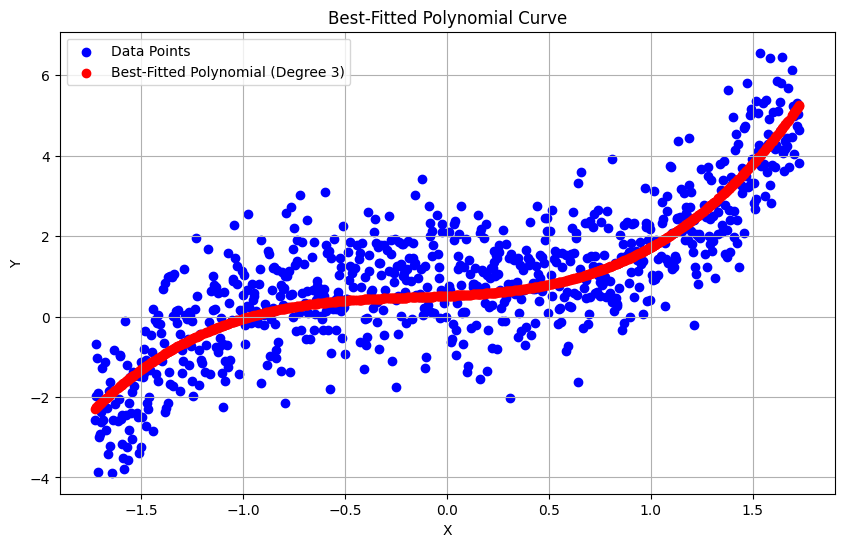

In [12]:
x_curve = np.column_stack([X_train**i for i in range(4)])
y_curve = (x_curve @ coeff[2])

# Plot the data points and the best-fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, label='Data Points', marker='o', color='blue')
plt.scatter(X_train, y_curve, label=f'Best-Fitted Polynomial (Degree {3})', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Best-Fitted Polynomial Curve')
plt.legend()
plt.grid(True)
plt.show()




## Task 4 : Comparitive Analysis

a. Perform the comparative analysis study of the nine polynomial regression
models developed.

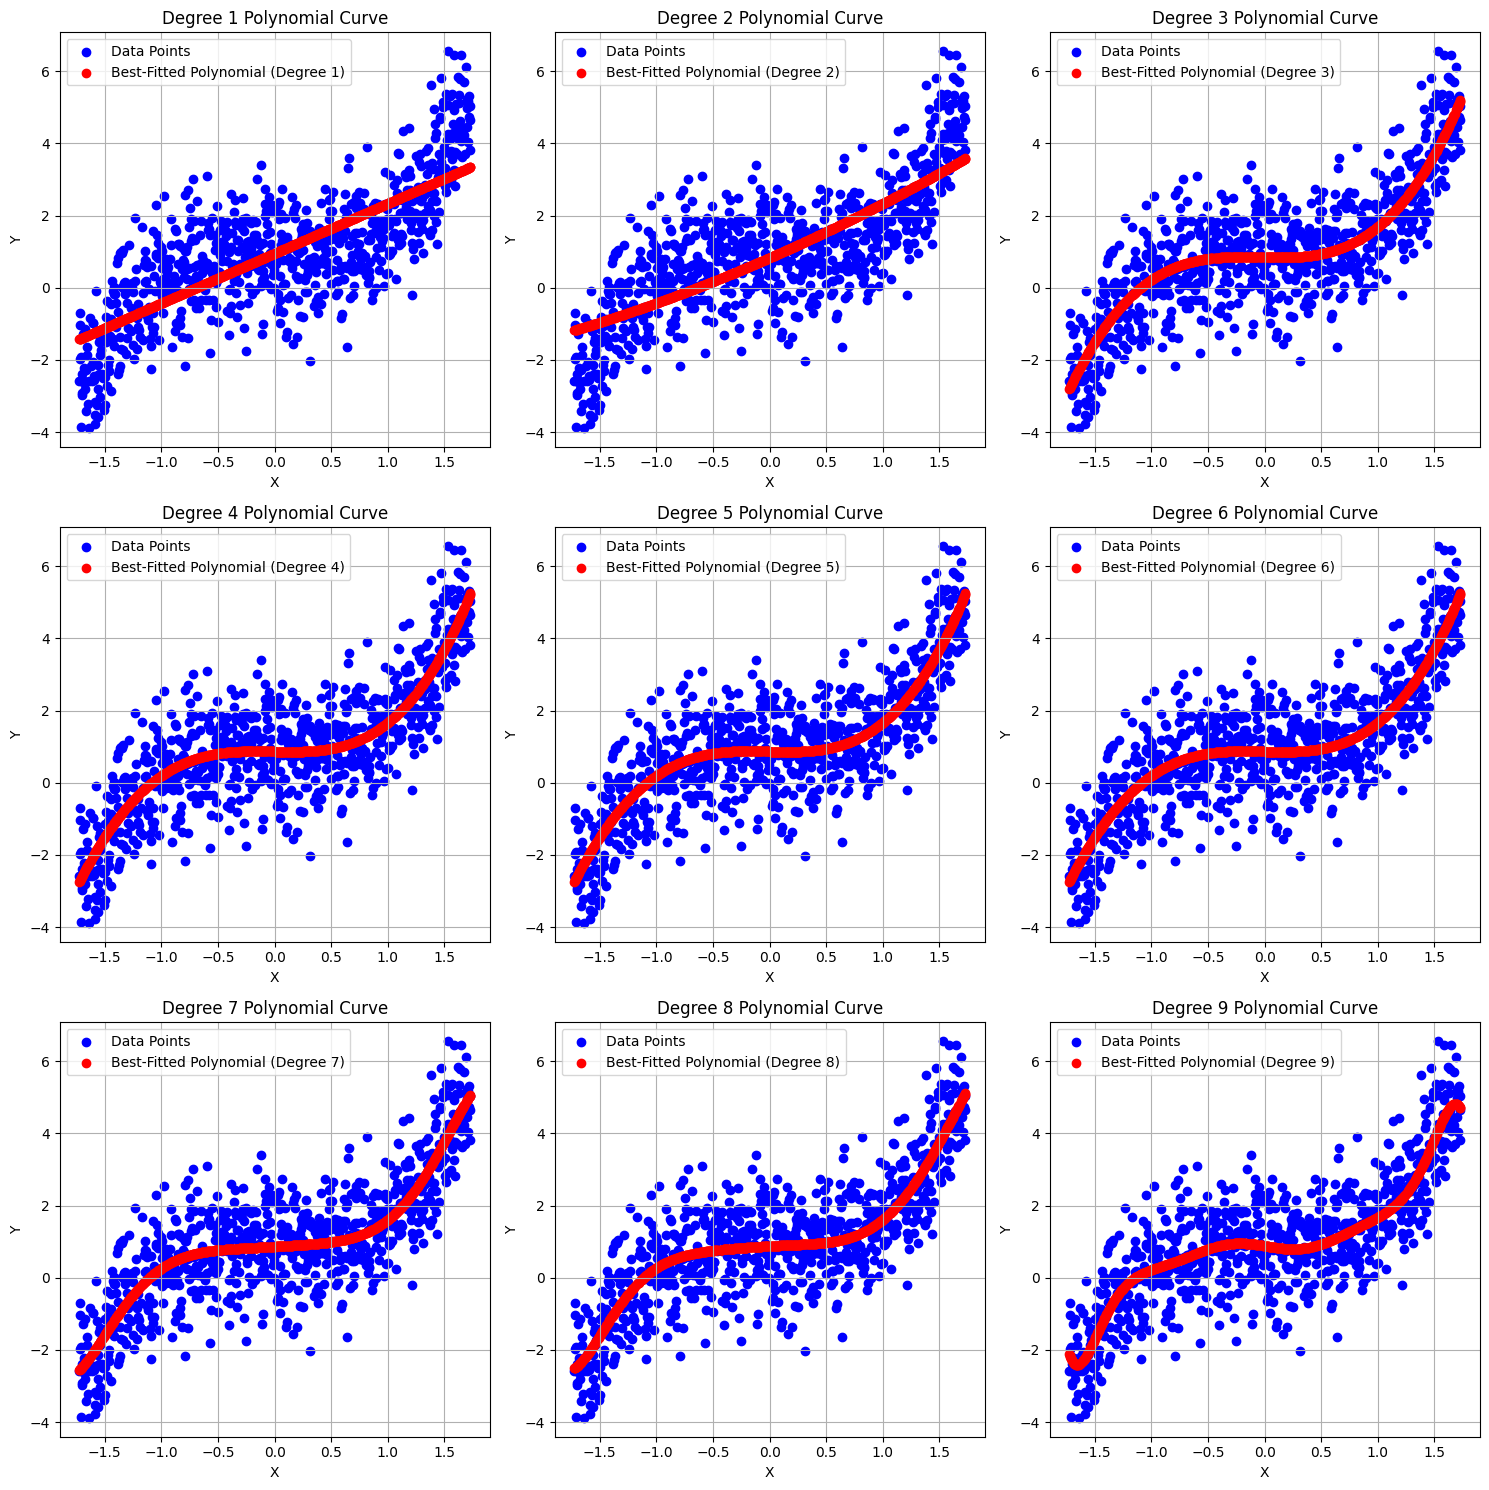

In [13]:
coeff = []
# Initialize a subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Iterate through each degree
for i, d in enumerate(degrees):
    # Calculate polynomial coefficients for the current degree
    x_curve = np.column_stack([X_train**j for j in range(d + 1)])
    coeff_d = np.linalg.inv(x_curve.T @ x_curve) @ x_curve.T @ Y_train
    coeff.append(coeff_d)

    current_coeff = coeff[i]  # Get coefficients for the current degree
    y_curve = x_curve @ current_coeff
    #coeff = np.linalg.inv(x_curve.T @ x_curve) @ x_curve.T @ Y_train

    # Create a set of x values for the curve
    #x_values = np.linspace(0, 5, 100)

    # Calculate the corresponding y values for the polynomial curve
   # y_curve = np.dot(np.column_stack([x_train**j for j in range(d + 1)]), coeff)

    # Plot the data points and the best-fitted polynomial curve
    row, col = divmod(i, 3)
    ax = axes[row, col]
    ax.scatter(X_train, Y_train, label='Data Points', marker='o', color='blue')
    ax.scatter(X_train, y_curve, label=f'Best-Fitted Polynomial (Degree {d})', color='red')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Degree {d} Polynomial Curve')
    ax.legend()
    ax.grid(True)

# Adjust spacing and show the plots
plt.tight_layout()
plt.show()



As we move to the left of degree 3, we can see the graph of degree 1 is underfiiting. On the other hand, it is also clear that as we move towards the right of degree 3, (i.e. the graph of degree 9) is overfitting.